<a href="https://colab.research.google.com/github/NAyeshaKhan/EDD_audio/blob/main/TL_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 756 files belonging to 3 classes.
Found 236 files belonging to 3 classes.


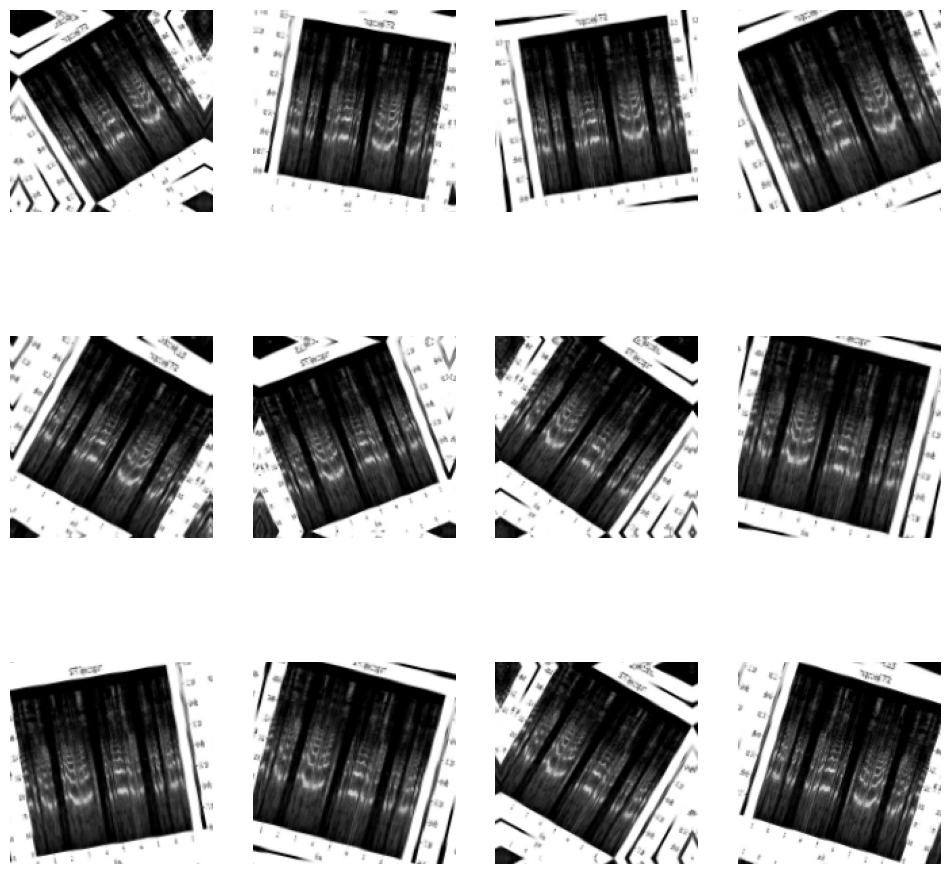

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Activation,Dropout,GlobalAveragePooling2D,MaxPooling2D,RandomFlip,RandomZoom,RandomRotation

warnings.filterwarnings("ignore")

# Define paths to your data
train_dir ="/content/drive/MyDrive/STFT_robo/train"
validation_dir ="/content/drive/MyDrive/STFT/val"
training_set = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(150, 150))
val_dataset = image_dataset_from_directory(validation_dir,
                                          shuffle=True,
                                          batch_size=32,
                                          image_size=(150, 150))
data_augmentation = keras.Sequential(
                  [tf.keras.layers.RandomFlip("horizontal"),
                  tf.keras.layers.RandomRotation(0.1),
                   RandomZoom(0.1)]
)
for images, labels in training_set.take(1):
    plt.figure(figsize=(12, 12))
    first_image = images[0]
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0)
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.axis("off")

In [14]:
#https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False)
base_model.trainable = True
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

model.compile(optimizer=keras.optimizers.Adam(1e-9), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])
history = model.fit(training_set, epochs=20,validation_data=val_dataset,callbacks=callbacks)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 373s 14s/step - accuracy: 0.4448 - loss: 0.0000e+00 - val_accuracy: 0.3220 - val_loss: 0.0000e+00
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 377s 14s/step - accuracy: 0.3282 - loss: 0.0000e+00 - val_accuracy: 0.2712 - val_loss: 0.0000e+00
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 383s 14s/step - accuracy: 0.4156 - loss: 0.0000e+00 - val_accuracy: 0.4068 - val_loss: 0.0000e+00
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 363s 13s/step - accuracy: 0.2151 - loss: 0.0000e+00 - val_accuracy: 0.1356 - val_loss: 0.0000e+00
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 332s 14s/step - accuracy: 0.2266 - loss: 0.0000e+00 - val_accuracy: 0.2712 - val_loss: 0.0000e+00
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 363s 13s/step - accuracy: 0.5457 - loss: 0.0000e+00 - val_accuracy: 0.4068 - val_loss: 0.0000e+00


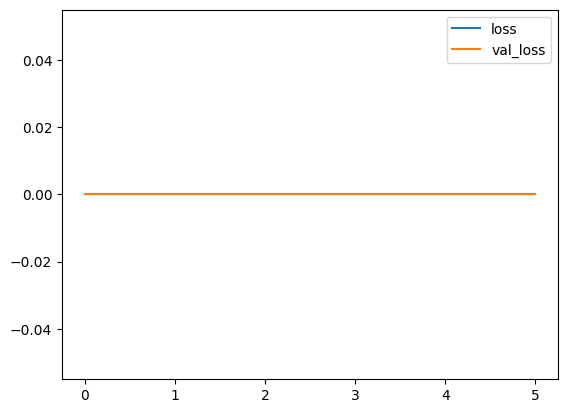

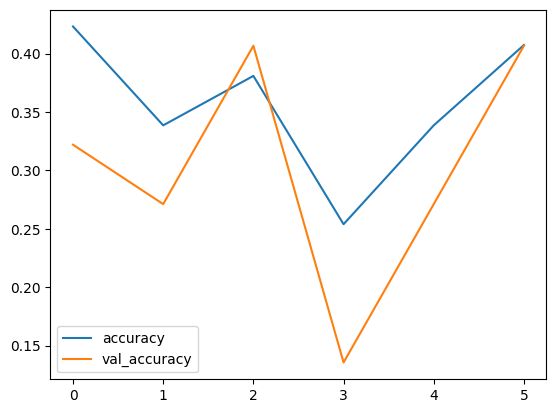

In [15]:
def plot_history(history):
    history_frame = pd.DataFrame(history.history)
    history_frame.loc[:, ['loss', 'val_loss']].plot()
    history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
    return

plot_history(history)